In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d
from numba import njit
import h5py as h5
import os

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [3]:
name = 'MW3_MHG0.25_GSE6_kick-lvl4'
nameiso = 'MW3iso_fg0.7_MHG0.25_RC9-lvl4'

In [4]:
snap = 100
MC = h5.File(basepath + 'anlys/MC/' + name + '/MC_Prop_' + str(snap).zfill(3) + '.h5', mode='r')
MCiso = h5.File(basepath + 'anlys/MC/' + nameiso + '/MC_Prop_' + str(snap).zfill(3) + '.h5', mode='r')

In [5]:
def get_gas(MC):
    gas = {}
    
    ptype = MC['PartType5/PartType'][:]
    gas['NumberDensity'] = MC['PartType5/NumberDensity'][ptype == 0]
    gas['Temperature'] = MC['PartType5/Temperature'][ptype == 0]
    gas['RotatedCoordinates'] = MC['PartType5/RotatedCoordinates'][:][ptype==0]
    gas['TracerMass'] = MC['Header'].attrs['TracerMass']
    
    return gas

In [6]:
gas = get_gas(MC)
gasiso = get_gas(MCiso)

[-6.0, 5.0, 1.0, 7.0]


[(-6.0, 5.0), (1.0, 7.0)]

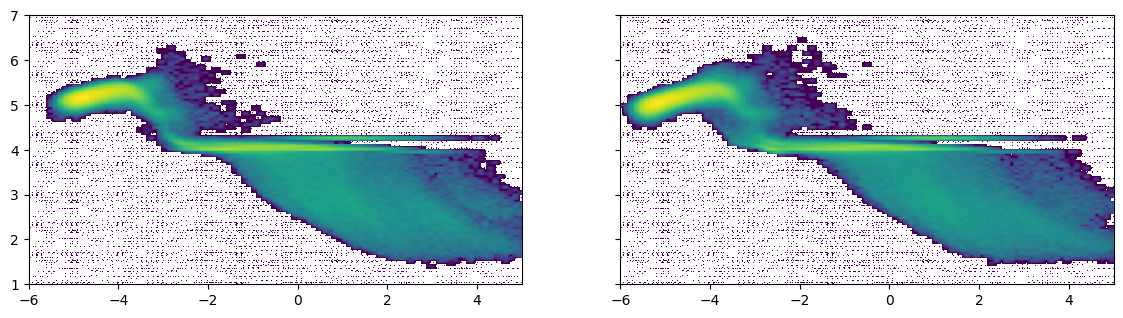

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

nbins = np.linspace(-6, 5, 100)
Tbins = np.linspace(1, 7, 100)
extent = [nbins[0], nbins[-1], Tbins[0], Tbins[-1]]
print(extent)

n = gasiso['NumberDensity']
T = gasiso['Temperature']
m = np.full(len(gasiso['Temperature']), gasiso['TracerMass'])
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n), np.log10(T), m,
                                                  statistic='sum', bins=(nbins, Tbins))
ax[0].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)

n = gas['NumberDensity']
T = gas['Temperature']
m = np.full(len(gas['Temperature']), gas['TracerMass'])
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n), np.log10(T), m,
                                                  statistic='sum', bins=(nbins, Tbins))

ax[1].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)

ax[0].set(xlim=(-6, 5), ylim=(1, 7))

[-6.0, 5.0, 1.0, 7.0]


[(-6.0, 5.0), (1.0, 7.0)]

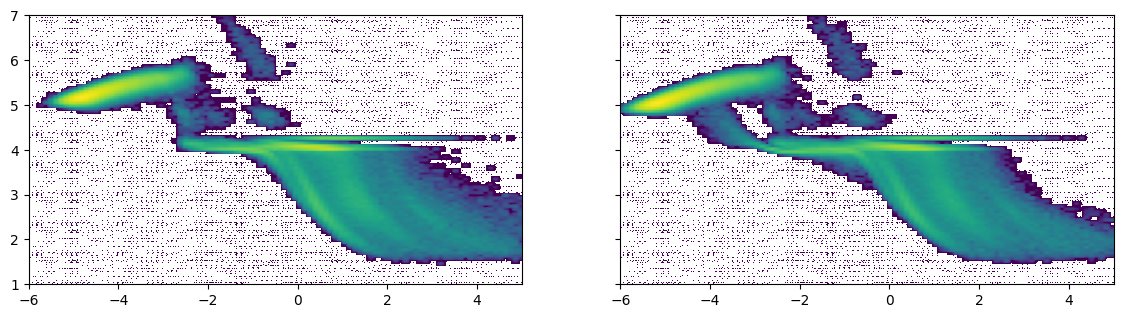

In [62]:
snap = 10
MC = h5.File(basepath + 'anlys/MC/' + name + '/MC_Prop_' + str(snap).zfill(3) + '.h5', mode='r')
MCiso = h5.File(basepath + 'anlys/MC/' + nameiso + '/MC_Prop_' + str(snap).zfill(3) + '.h5', mode='r')

gas = get_gas(MC)
gasiso = get_gas(MCiso)

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

nbins = np.linspace(-6, 5, 100)
Tbins = np.linspace(1, 7, 100)
extent = [nbins[0], nbins[-1], Tbins[0], Tbins[-1]]
print(extent)

n = gasiso['NumberDensity']
T = gasiso['Temperature']
m = np.full(len(gasiso['Temperature']), gasiso['TracerMass'])
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n), np.log10(T), m,
                                                  statistic='sum', bins=(nbins, Tbins))
ax[0].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)

n = gas['NumberDensity']
T = gas['Temperature']
m = np.full(len(gas['Temperature']), gas['TracerMass'])
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n), np.log10(T), m,
                                                  statistic='sum', bins=(nbins, Tbins))

ax[1].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)

ax[0].set(xlim=(-6, 5), ylim=(1, 7))

[-6.0, 5.0, 1.0, 7.0]


[(-6.0, 5.0), (1.0, 7.0)]

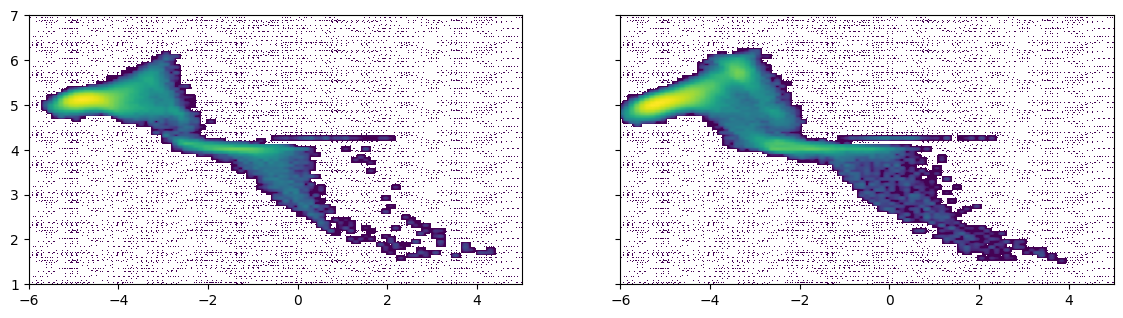

In [52]:
snap = 300
MC = h5.File(basepath + 'anlys/MC/' + name + '/MC_Prop_' + str(snap).zfill(3) + '.h5', mode='r')
MCiso = h5.File(basepath + 'anlys/MC/' + nameiso + '/MC_Prop_' + str(snap).zfill(3) + '.h5', mode='r')

gas = get_gas(MC)
gasiso = get_gas(MCiso)

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# nbins = np.linspace(-5.5, -1, 100)
# Tbins = np.linspace(3.8, 7.9, 100)

nbins = np.linspace(-6, 5, 100)
Tbins = np.linspace(1, 7, 100)
extent = [nbins[0], nbins[-1], Tbins[0], Tbins[-1]]
print(extent)

n = gasiso['NumberDensity']
T = gasiso['Temperature']
pos = gasiso['RotatedCoordinates']

R = np.linalg.norm(pos[:,:2], axis=1)
z = pos[:,2]
out_disk = np.logical_or(R > 15, np.abs(z) > 3)
n = n[out_disk]
T = T[out_disk]

m = np.full(len(T), gasiso['TracerMass'])
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n), np.log10(T), m,
                                                  statistic='sum', bins=(nbins, Tbins))
ax[0].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)

n = gas['NumberDensity']
T = gas['Temperature']

pos = gas['RotatedCoordinates']

R = np.linalg.norm(pos[:,:2], axis=1)
z = pos[:,2]
out_disk = np.logical_or(R > 15, np.abs(z) > 3)
n = n[out_disk]
T = T[out_disk]

m = np.full(len(T), gas['TracerMass'])
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n), np.log10(T), m,
                                                  statistic='sum', bins=(nbins, Tbins))

ax[1].imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)

ax[0].set(xlim=(nbins[0], nbins[-1]), ylim=(Tbins[0], Tbins[-1]))

In [37]:
def compute_initial_r(name, snap):
    MC0 = h5.File(basepath + 'anlys/MC/' + name + '/MC_Prop_' + str(0).zfill(3) + '.h5', mode='r')
    MC = h5.File(basepath + 'anlys/MC/' + name + '/MC_Prop_' + str(snap).zfill(3) + '.h5', mode='r')
    
    gas0 = get_gas(MC0)
    gas = get_gas(MC)
    
    pos = MC['PartType5/RotatedCoordinates'][:]
    ptype = MC['PartType5/PartType'][:]
    pos0 = MC0['PartType5/RotatedCoordinates'][:]
    memb = MC['PartType5/Membership'][:]
    R = np.linalg.norm(pos[:,:2], axis=1)
    z = pos[:,2]
    in_disk = np.logical_and(R < 10, np.abs(z) < 3)
    
    in_disk = np.logical_and(R > 6, in_disk)
    
    in_disk = np.logical_and(in_disk, ptype==0)
    in_disk = np.logical_and(in_disk, memb==1)
    
    r0 = np.linalg.norm(pos0, axis=1)
    mass = MC['Header'].attrs['TracerMass']
    
    return r0, in_disk, memb, mass

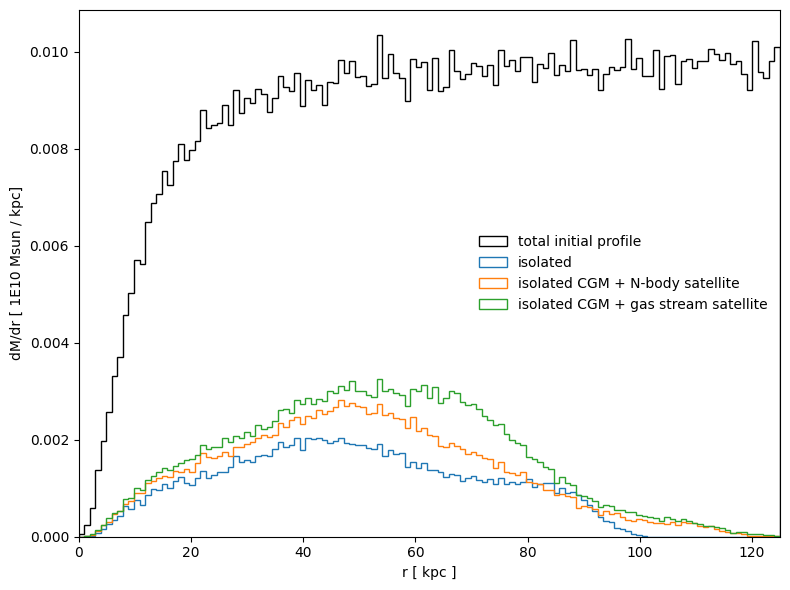

In [38]:
name = 'MW3_MHG0.25_GSE6_kick-lvl4'
namemrgN = 'MW3_MHG0.25_GSE2N-lvl4'
nameiso = 'MW3iso_fg0.7_MHG0.25_RC9-lvl4'
snap = 350

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

bins = np.linspace(0, 125, 128)
dx = bins[1] - bins[0]

r0, in_disk, memb, mass = compute_initial_r(nameiso, snap)
ax.hist(r0[memb==1], weights=np.full(len(np.where(memb==1)[0]), mass/dx),
         label = 'total initial profile',
         bins=bins, histtype='step', color='k');
ax.hist(r0[in_disk], weights=np.full(len(np.where(in_disk)[0]), mass/dx), 
         label = 'isolated',
         bins=bins, histtype='step');

r0, in_disk, memb, mass = compute_initial_r(namemrgN, snap)
ax.hist(r0[in_disk], weights=np.full(len(np.where(in_disk)[0]), mass/dx),
         label = 'isolated CGM + N-body satellite',
         bins=bins, histtype='step');

r0, in_disk, memb, mass = compute_initial_r(name, snap)
ax.hist(r0[in_disk], weights=np.full(len(np.where(in_disk)[0]), mass/dx), 
         label = 'isolated CGM + gas stream satellite',
         bins=bins, histtype='step');


# plt.ylim(0, 100000)
ax.set_xlim(bins[0], bins[-1])
ax.legend(frameon=False)
ax.set_xlabel('r [ kpc ]')
ax.set_ylabel('dM/dr [ 1E10 Msun / kpc]')
fig.tight_layout()


### CGM inflow rate

In [92]:
name = 'MW3_MHG0.25_GSE6'
namemrgN = 'MW3_MHG0.25_GSE2N'
nameiso = 'MW3iso_fg0.7_MHG0.25_RC9'
snap = 400

sn = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4/output', snap, combineFiles=True)
snmrgN = arepo.Snapshot(basepath + 'runs/' + namemrgN + '/lvl4/output', snap, combineFiles=True)
sniso = arepo.Snapshot(basepath + 'runs/' + nameiso + '/lvl4/output', snap, combineFiles=True)

COM = np.load(basepath + 'anlys/COM/COM_' + name + '-lvl4.npy', allow_pickle=True).item()
COMmrgN = np.load(basepath + 'anlys/COM/COM_' + namemrgN + '-lvl4.npy', allow_pickle=True).item()
COMiso = np.load(basepath + 'anlys/COM/COM_' + nameiso + '-lvl4.npy', allow_pickle=True).item()

MW_COM = COM['MW_COM'][snap]
MW_COMmrgN = COMmrgN['MW_COM'][snap]
MW_COMiso = COMiso['MW_COM'][snap]

MW_COMV = COM['MW_COMV'][snap]
MW_COMVmrgN = COMmrgN['MW_COMV'][snap]
MW_COMViso = COMiso['MW_COMV'][snap]

In [93]:
def compute_flow_profile(sn, MW_COM, MW_COMV, dr=1.0, rmax=200):
    pos = sn.part0.pos.value - MW_COM
    vel = sn.part0.vel.value - MW_COMV
    mass = sn.part0.mass.value
    
    r = np.linalg.norm(pos, axis=1)
    R = np.linalg.norm(pos[:,:2], axis=1)
    cphi = pos[:,0]/R
    sphi = pos[:,1]/R
    ctheta = pos[:,2]/r
    stheta = np.sqrt(1 - ctheta**2)
    
    vr = stheta * cphi * vel[:,0] + stheta * sphi * vel[:,1] + ctheta * vel[:,2]
    
    out = {}
    out['aver'] = []
    out['inflow'] = []
    out['outflow'] = []
    
    rmin = 0.0
    
    while rmin < rmax:
        in_shell = np.logical_and(r >= rmin, r < rmin + dr)
        
        out['aver'].append(np.mean(r[in_shell]))
        
        inflowing = np.logical_and(in_shell, vr < 0)
        outflowing = np.logical_and(in_shell, vr > 0)
        
        inflow = np.sum(mass[inflowing] * vr[inflowing]) / dr
        outflow = np.sum(mass[outflowing] * vr[outflowing]) / dr
        
        out['inflow'].append(inflow)
        out['outflow'].append(outflow)
        
        rmin += dr
    
    out['aver'] = np.array(out['aver'])
    out['inflow'] = np.array(out['inflow'])
    out['outflow'] = np.array(out['outflow'])
    
    return out

In [98]:
dr = 0.4
flow = compute_flow_profile(sn, MW_COM, MW_COMV, dr=dr, rmax=300)
flowmrgN = compute_flow_profile(snmrgN, MW_COMmrgN, MW_COMVmrgN, dr=dr, rmax=300)
flowiso = compute_flow_profile(sniso, MW_COMiso, MW_COMViso, dr=dr, rmax=300)

Text(0, 0.5, 'inflow rate [1E10 Msun/Gyr]')

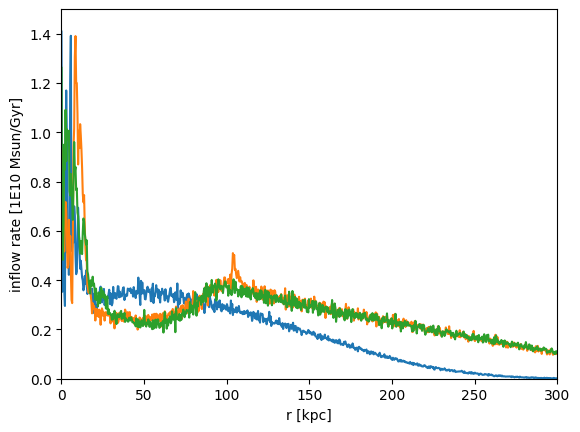

In [103]:
plt.plot(flowiso['aver'], -flowiso['inflow'])
plt.plot(flow['aver'], -flow['inflow'])
plt.plot(flowmrgN['aver'], -flowmrgN['inflow'])
# plt.xlim(0, 20)
plt.xlim(0, 300)
plt.ylim(0, 1.5)

plt.xlabel('r [kpc]')
plt.ylabel('inflow rate [1E10 Msun/Gyr]')
# plt.plot(flow['aver'], flow['outflow'])

Text(0, 0.5, 'outflow rate [1E10 Msun/Gyr]')

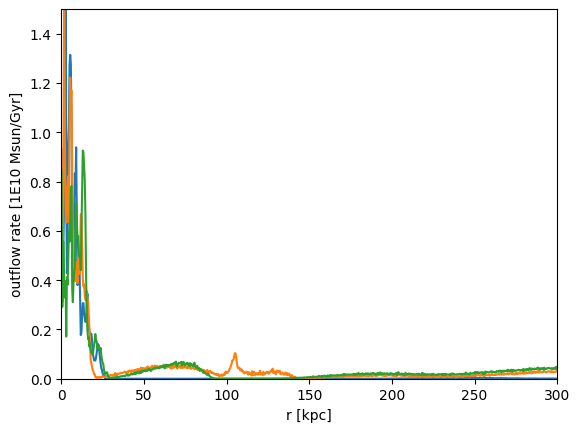

In [105]:
plt.plot(flowiso['aver'], flowiso['outflow'])
plt.plot(flow['aver'], flow['outflow'])
plt.plot(flowmrgN['aver'], flowmrgN['outflow'])
# plt.xlim(0, 20)
plt.xlim(0, 300)
plt.ylim(0, 1.5)

plt.xlabel('r [kpc]')
plt.ylabel('outflow rate [1E10 Msun/Gyr]')
# plt.plot(flow['aver'], flow['outflow'])

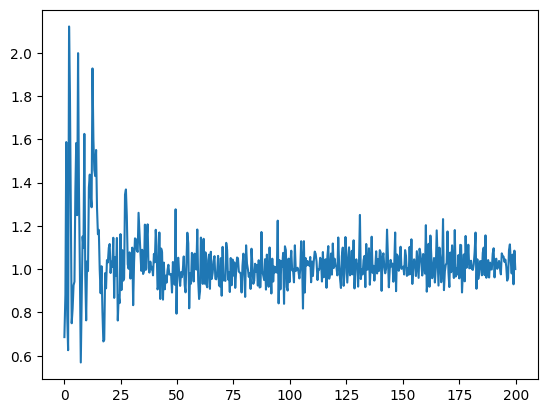

In [112]:
plt.plot(flow['aver'], flow['inflow']/flowmrgN['inflow'])

### cold gas composition over time

In [42]:
name = 'MW3_MHG0.25_GSE6_kick'
namemrgN = 'MW3_MHG0.25_GSE2N'
nameiso = 'MW3iso_fg0.7_MHG0.25_RC9'

COM = np.load(basepath + 'anlys/COM/COM_' + name + '-lvl4.npy', allow_pickle=True).item()
COMmrgN = np.load(basepath + 'anlys/COM/COM_' + namemrgN + '-lvl4.npy', allow_pickle=True).item()
COMiso = np.load(basepath + 'anlys/COM/COM_' + nameiso + '-lvl4.npy', allow_pickle=True).item()

In [7]:
def get_gas(MC):
    gas = {}
    
    ptype = MC['PartType5/PartType'][:]
    gas['NumberDensity'] = MC['PartType5/NumberDensity'][:][ptype == 0]
    gas['Temperature'] = MC['PartType5/Temperature'][:][ptype == 0]
    gas['RotatedCoordinates'] = MC['PartType5/RotatedCoordinates'][:][ptype==0]
    gas['TracerMass'] = MC['Header'].attrs['TracerMass']
    gas['Membership'] = MC['PartType5/Membership'][:][ptype==0]
    
    return gas

In [8]:
def get_n_T(sn):
    UnitLength = sn.parameters.UnitLength_in_cm
    UnitMass = sn.parameters.UnitMass_in_g
    UnitVelocity = sn.parameters.UnitVelocity_in_cm_per_s

    UnitTime = UnitLength / UnitVelocity
    UnitEnergy = UnitMass * UnitVelocity**2

    HYDROGEN_MASSFRAC = 0.76
    GAMMA = 5./3.
    PROTONMASS = 1.67262178e-24
    BOLTZMANN = 1.38065e-16

    InternalEnergy = sn.part0.InternalEnergy.value
    ElectronAbundance = sn.part0.ElectronAbundance
    Density = sn.part0.Density.value
    
    mu = 4 * PROTONMASS / (1 + 3 * HYDROGEN_MASSFRAC + 4 * HYDROGEN_MASSFRAC * ElectronAbundance)
    T = (GAMMA - 1.) * (InternalEnergy / BOLTZMANN) * (UnitEnergy / UnitMass) * mu

    n = Density / mu
    n *= UnitMass/UnitLength**3
    
    return n, T

In [9]:
def get_CGM_cold_gas(MC, rcut=30, Tcut=3E4):
    gas = get_gas(MC)
    
    pos = gas['RotatedCoordinates']
    r = np.linalg.norm(pos, axis=1)
    T = gas['Temperature']
    memb = gas['Membership']
    
    from_CGM = memb == 1
    in_CGM = r > rcut
    cold = T < Tcut
    cold_CGM = np.logical_and(np.logical_and(in_CGM, cold), from_CGM)
    
    mass_CGM = gas['TracerMass'] * len(np.where(cold_CGM)[0])
    
    return MC['Header'].attrs['Time'], mass_CGM
    

In [13]:
def coldCGM_loop(name, snap_list = np.arange(0, 1000, 25)):
    out = {}
    out['Time'] = []
    out['ColdMassCGM'] = []

    COM = np.load(basepath + 'anlys/COM/COM_' + name + '-lvl4.npy', allow_pickle=True).item()
    
    for snap in tqdm(snap_list):
        try:
        # if True:
            # print(snap)
            MC = h5.File(basepath + 'anlys/MC/' + name + '-lvl4/MC_Prop_' + str(snap).zfill(3) + '.h5', mode='r')
            Time, ColdMassCGM = get_CGM_cold_gas(MC)
            out['Time'].append(Time)
            out['ColdMassCGM'].append(ColdMassCGM)
            # print('d')
        except:
            pass
        

    out['Time'] = np.array(out['Time'])
    out['ColdMassCGM'] = np.array(out['ColdMassCGM'])
    
    return out
    

In [88]:
coldCGM = coldCGM_loop(name)

100%|██████████| 40/40 [00:06<00:00,  6.04it/s]


In [89]:
coldCGM_mrgn = coldCGM_loop(namemrgN)

100%|██████████| 40/40 [00:05<00:00,  6.81it/s]


In [90]:
coldCGM_iso = coldCGM_loop(nameiso)

100%|██████████| 40/40 [00:09<00:00,  4.29it/s]


(0.0, 5.0)

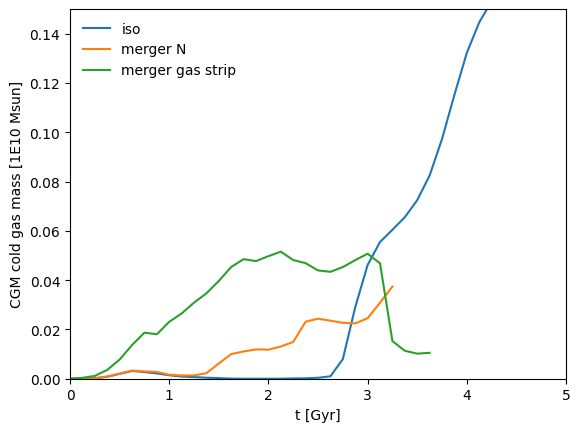

In [107]:
plt.plot(coldCGM_iso['Time'], coldCGM_iso['ColdMassCGM'], label='iso')
plt.plot(coldCGM_mrgn['Time'], coldCGM_mrgn['ColdMassCGM'], label='merger N')
plt.plot(coldCGM['Time'], coldCGM['ColdMassCGM'], label='merger gas strip')
plt.xlabel('t [Gyr]')
plt.ylabel('CGM cold gas mass [1E10 Msun]')
plt.legend(frameon=False)
plt.ylim(0, 0.15)
plt.xlim(0, 5)

In [108]:
sfr = np.genfromtxt('/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/runs/MW3_MHG0.25_GSE6_kick/lvl4/output/sfr.txt')

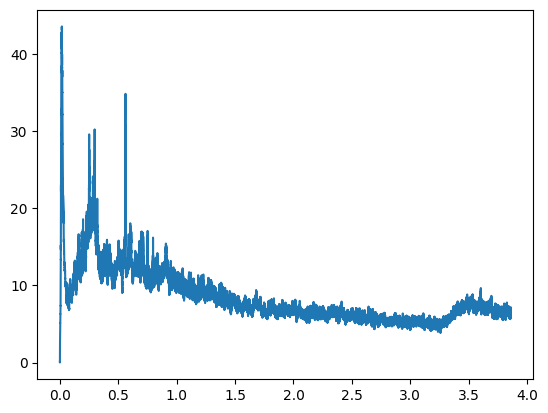

In [109]:
plt.plot(sfr[:,0], sfr[:,2])
plt.

In [121]:
sfr = np.genfromtxt('/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/runs/MW4_MHG0.25_GSE6/lvl4/output/sfr.txt')

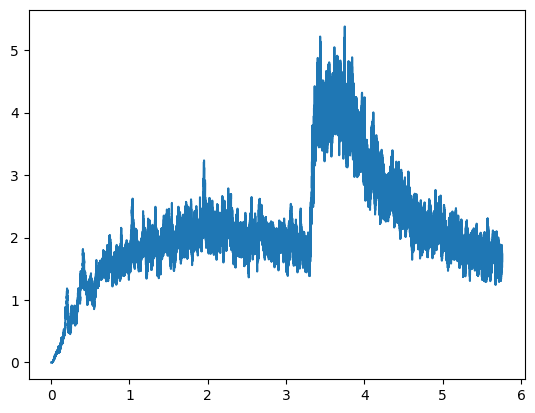

In [122]:
plt.plot(sfr[:,0], sfr[:,2])

In [124]:
sfriso = np.genfromtxt('/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/runs/MW4iso_fg0.2_MHG0.25_RC9/lvl4/output/sfr.txt')

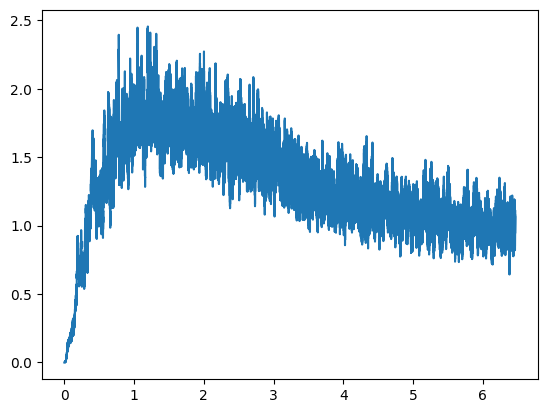

In [125]:
plt.plot(sfriso[:,0], sfriso[:,2])

(0.0, 5.6477588999999995)

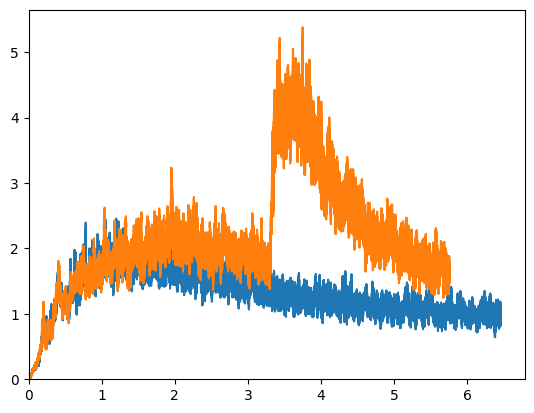

In [126]:
plt.plot(sfriso[:,0], sfriso[:,2])
plt.plot(sfr[:,0], sfr[:,2])
plt.xlim(0, None)
plt.ylim(0, None)

In [16]:
name = 'MW4_MHG0.25_GSE6'
nameMW3 = 'MW3_MHG0.25_GSE6'
nameiso = 'MW4iso_fg0.2_MHG0.25_RC9'
nameMW3kick = 'MW3_MHG0.25_GSE6_kick'

In [12]:
coldCGM = coldCGM_loop(name)

100%|██████████| 40/40 [00:13<00:00,  2.95it/s]


In [14]:
coldMW3 = coldCGM_loop(nameMW3)

100%|██████████| 40/40 [00:08<00:00,  4.90it/s]


In [118]:
coldCGMiso = coldCGM_loop(nameiso)

100%|██████████| 40/40 [00:00<00:00, 19747.19it/s]


In [17]:
coldCGMkick = coldCGM_loop(nameMW3kick)

100%|██████████| 40/40 [00:17<00:00,  2.30it/s]


(0.0, 5.0)

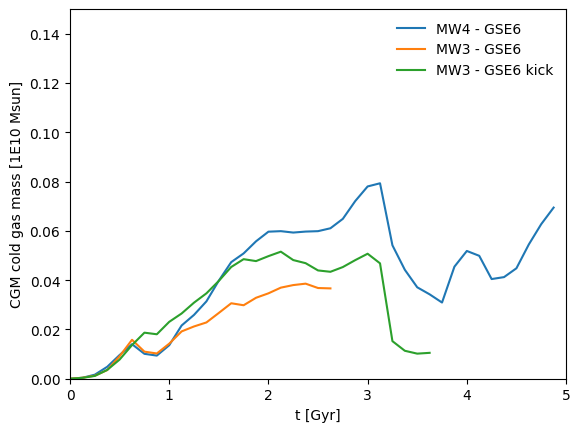

In [18]:
# plt.plot(coldCGM_iso['Time'], coldCGM_iso['ColdMassCGM'], label='iso')
# plt.plot(coldCGM_mrgn['Time'], coldCGM_mrgn['ColdMassCGM'], label='merger N')
plt.plot(coldCGM['Time'], coldCGM['ColdMassCGM'], label='MW4 - GSE6')
plt.plot(coldMW3['Time'], coldMW3['ColdMassCGM'], label='MW3 - GSE6')
plt.plot(coldCGMkick['Time'], coldCGMkick['ColdMassCGM'], label='MW3 - GSE6 kick')
plt.xlabel('t [Gyr]')
plt.ylabel('CGM cold gas mass [1E10 Msun]')
plt.legend(frameon=False)
plt.ylim(0, 0.15)
plt.xlim(0, 5)

In [130]:
coldMW3

{'Time': array([], dtype=float64), 'ColdMassCGM': array([], dtype=float64)}